<a href="https://colab.research.google.com/github/GraceRod/Serial-Killer-Data-Analysis/blob/main/AI_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing all the required libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
#Symptom description data
symptom_description=pd.read_csv('/content/symptom_Description.csv')
symptom_description.columns=['Disease','Description']
symptom_description.head()

,Disease,Description
0,Malaria,An infectious disease caused by protozoan para...
1,Allergy,An allergy is an immune system response to a f...
2,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
3,Psoriasis,Psoriasis is a common skin disorder that forms...
4,GERD,"Gastroesophageal reflux disease, or GERD, is a..."


In [6]:
#Precautions to be taken data
symptom_precaution=pd.read_csv('/content/symptom_precaution.csv')
symptom_precaution.columns=['Disease','Precaution1','Precaution2','Precaution3','Precaution4']
symptom_precaution.head()

,Disease,Precaution1,Precaution2,Precaution3,Precaution4
0,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
1,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
2,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
3,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
4,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise


In [7]:
#Training and testing data
training = pd.read_csv('/content/Training.csv')
testing= pd.read_csv('/content/Testing.csv')
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']

In [8]:
#Mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [9]:
#Creating training and validation datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [10]:
testx    = testing[cols]
testy    = testing['prognosis'] 
testy    = le.transform(testy)

In [11]:
print(x.shape, y.shape)
print(testx.shape, testy.shape)

(4920, 132) (4920,)
(4920, 132) (4920,)


In [12]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y)
testy = to_categorical(testy)

In [13]:
print(x.shape, y.shape)
print(testx.shape, testy.shape)

(4920, 132) (4920, 41)
(4920, 132) (4920, 41)


In [14]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

In [15]:
#Neural network with relu funtion in the hidden layers and softmax function for the output layer
model1=Sequential()
model1.add(Dense(512,input_dim=132,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(128,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(41,activation='softmax'))

In [16]:
#Adam optimiser
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               68096     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3296, 132) (3296, 41)
(1624, 132) (1624, 41)


In [20]:
history1=model1.fit(x_train, y_train, validation_data = (x_test , y_test) ,epochs=5, batch_size=10)

Epoch 1/5
330/330 [==============================] - 3s 6ms/step - loss: 0.3889 - accuracy: 0.9515 - val_loss: 0.2831 - val_accuracy: 1.0000
Epoch 2/5
330/330 [==============================] - 2s 5ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/5
330/330 [==============================] - 2s 5ms/step - loss: 0.0115 - accuracy: 0.9997 - val_loss: 6.0644e-04 - val_accuracy: 1.0000
Epoch 4/5
330/330 [==============================] - 2s 5ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.6137e-04 - val_accuracy: 1.0000
Epoch 5/5
330/330 [==============================] - 2s 5ms/step - loss: 0.0051 - accuracy: 0.9997 - val_loss: 2.0863e-04 - val_accuracy: 1.0000


In [21]:
#SGD optimiser
model2=Sequential()
model2.add(Dense(512,input_dim=132,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(41,activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

history2=model2.fit(x_train, y_train, validation_data = (x_test , y_test) ,epochs=5, batch_size=10)

Epoch 1/5
330/330 [==============================] - 3s 4ms/step - loss: 0.6065 - accuracy: 0.9323 - val_loss: 1.1379 - val_accuracy: 0.9951
Epoch 2/5
330/330 [==============================] - 1s 4ms/step - loss: 0.1336 - accuracy: 0.9979 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 3/5
330/330 [==============================] - 2s 7ms/step - loss: 0.0841 - accuracy: 0.9991 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 4/5
330/330 [==============================] - 1s 4ms/step - loss: 0.0568 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/5
330/330 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9997 - val_loss: 0.0037 - val_accuracy: 1.0000


In [22]:
#RMSprop optimiser
model3=Sequential()
model3.add(Dense(512,input_dim=132,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(128,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(41,activation='softmax'))

model3.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

history3=model3.fit(x_train, y_train, validation_data = (x_test , y_test) ,epochs=5, batch_size=10)

Epoch 1/5
330/330 [==============================] - 3s 6ms/step - loss: 0.3122 - accuracy: 0.9624 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 2/5
330/330 [==============================] - 2s 5ms/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 7.8495e-05 - val_accuracy: 1.0000
Epoch 3/5
330/330 [==============================] - 2s 7ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 6.5968e-06 - val_accuracy: 1.0000
Epoch 4/5
330/330 [==============================] - 2s 7ms/step - loss: 9.3329e-04 - accuracy: 0.9997 - val_loss: 1.4605e-06 - val_accuracy: 1.0000
Epoch 5/5
330/330 [==============================] - 2s 5ms/step - loss: 1.8985e-04 - accuracy: 1.0000 - val_loss: 4.7162e-07 - val_accuracy: 1.0000


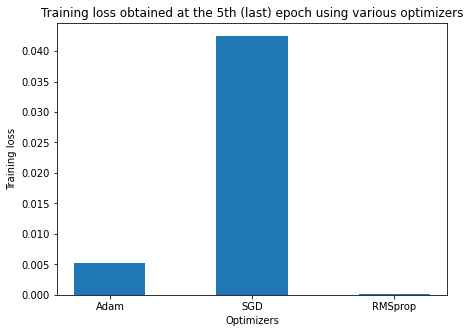

In [23]:
import matplotlib.pyplot as plt
data = {'Adam':history1.history['loss'][4], 'SGD':history2.history['loss'][4], 'RMSprop':history3.history['loss'][4]} 
optimizers = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (7, 5)) 
  
# creating the bar plot 
plt.bar(optimizers, values, width = 0.5) 
  
plt.xlabel("Optimizers") 
plt.ylabel("Training loss") 
plt.title("Training loss obtained at the 5th (last) epoch using various optimizers") 
plt.show() 

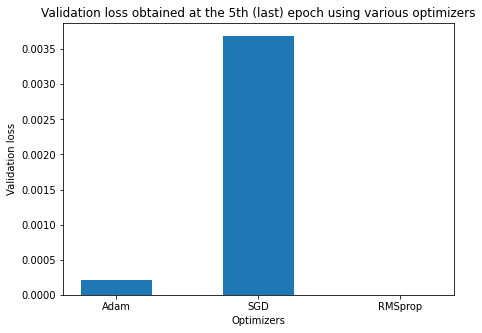

In [24]:
import matplotlib.pyplot as plt
data = {'Adam':history1.history['val_loss'][4], 'SGD':history2.history['val_loss'][4], 'RMSprop':history3.history['val_loss'][4]} 
optimizers = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (7, 5)) 
  
# creating the bar plot 
plt.bar(optimizers, values, width = 0.5) 
  
plt.xlabel("Optimizers") 
plt.ylabel("Validation loss") 
plt.title("Validation loss obtained at the 5th (last) epoch using various optimizers") 
plt.show() 

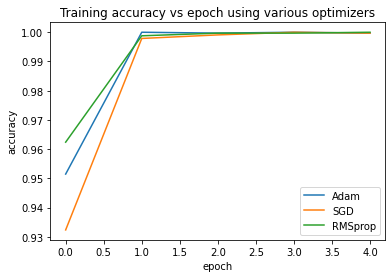

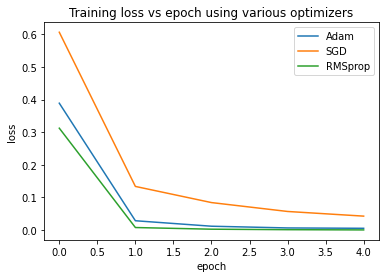

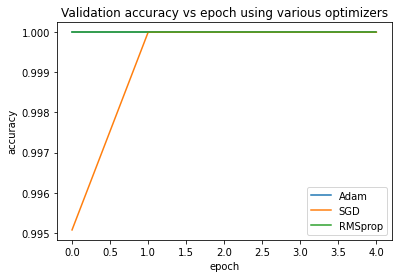

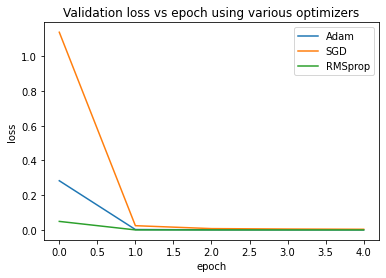

In [25]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.title('Training accuracy vs epoch using various optimizers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Adam', 'SGD', 'RMSprop'], loc='lower right')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('Training loss vs epoch using various optimizers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adam', 'SGD', 'RMSprop'], loc='upper right')
plt.show()

plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Validation accuracy vs epoch using various optimizers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Adam', 'SGD', 'RMSprop'], loc='lower right')
plt.show()

plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.title('Validation loss vs epoch using various optimizers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adam', 'SGD', 'RMSprop'], loc='upper right')
plt.show()

In [26]:
y_pred=model1.predict(testx)
y_pred1=np.argmax(y_pred,axis=1)
testy1=np.argmax(testy,axis=1)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(testy1,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       120
          10       1.00      1.00      1.00       120
          11       1.00      1.00      1.00       120
          12       1.00      1.00      1.00       120
          13       1.00      1.00      1.00       120
          14       1.00      1.00      1.00       120
          15       1.00      1.00      1.00       120
          16       1.00      1.00      1.00       120
          17       1.00    

In [28]:
symptoms=pd.DataFrame(columns=x.columns)
symptoms.at[0,symptoms.columns]=int(0)
symptoms

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
def getDisease():
  symptoms=pd.DataFrame(columns=x.columns)
  symptoms.at[0,symptoms.columns]=int(0)
  
  n=int(input('How many symptoms are you experiencing? '))
  for i in range(n):
    symp=input('Enter the symptom: ')
    if symp in symptoms.columns:
      symptoms.at[0,symp]=int(1)

  symps=symptoms.astype(float).astype('int64')

  pred_dis=model3.predict(symps)
  disease=np.argmax(pred_dis,axis=1)
  disease_name=le.inverse_transform(disease)
  description_position=symptom_description[symptom_description['Disease']==disease_name[0]].index.values
  precaution_position=symptom_precaution[symptom_precaution['Disease']==disease_name[0]].index.values

  precaution1=symptom_precaution['Precaution1'].loc[precaution_position[0]]
  precaution2=symptom_precaution['Precaution2'].loc[precaution_position[0]]
  precaution3=symptom_precaution['Precaution3'].loc[precaution_position[0]]
  return print('You have',disease_name[0],'\n\n',symptom_description['Description'].loc[description_position[0]],'\n\n','You can do the following to treat your symptoms: \n',precaution1,'\n',precaution2,'\n',precaution3)

In [34]:
getDisease()

How many symptoms are you experiencing? 2
Enter the symptom: itching
Enter the symptom: skin_rash
You have Fungal infection 

 In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi. 

 You can do the following to treat your symptoms: 
 bath twice 
 use detol or neem in bathing water 
 keep infected area dry
